# CODE COMPLETION

In [5]:
from langchain_ollama import OllamaLLM

model = OllamaLLM(model="qwen2.5-coder")

In [6]:
prompt=""" 
You're an expert code completion AI Bot.
Given a user prompt, you should generate a code completion. Based on that

User Query: {query} \n

Strictly follow bellow format:

ans : {{ code here }}

 Example:
   user query : def max(a, b):
   ans:   {{def max(a, b):
            return a if a > b else b }}
 Example:
   user query: write me the nth fibonacci number
   ans: {{ def fib(n):
            if n <= 1:
                return n
            return fib(n-1) + fib(n-2)  
            }}   
 
You must return in this fromat strictly ans : {{ code here }}     
"""

In [7]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.output_parsers import JsonOutputParser, StrOutputParser


In [8]:
str_output_parser = StrOutputParser()
json_output_parser = JsonOutputParser()

In [9]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", prompt),
        # MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{query}"),
    ]
)

In [10]:
code_completion_chain = qa_prompt | model | str_output_parser

In [11]:
ans=code_completion_chain.invoke({"query": "def min(a, b):"})

In [12]:
print(ans)

ans : {def min(a, b):
         return a if a < b else b}


In [13]:
ans=code_completion_chain.invoke({"query": "write binanry search code"})

In [14]:
print(ans)

ans: ```python
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
            
    return -1
```


In [15]:
ans=code_completion_chain.invoke({"query": "def Fib(n):"}
                                 )

In [16]:
print(ans)

ans : {def Fib(n):
            if n <= 0:
                return "Input should be a positive integer"
            elif n == 1:
                return 0
            elif n == 2:
                return 1
            else:
                a, b = 0, 1
                for _ in range(2, n):
                    a, b = b, a + b
                return b}


# Basic NLP


### Translation

In [17]:

from langchain_ollama import OllamaLLM

model = OllamaLLM(model="llama3.2")

In [18]:
prompt=""" 
Youre an expert Translator From English to French.

Given user query, you should translate the query to French.

user query: {query} \n

Strictly follow bellow format:
{{
    english: 
    french:    
}}

example:
    user query: hello
    {{
        english: hello
        french: bonjour
    }}
  
"""

In [19]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", prompt),
        # MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{query}"),
    ]
)

In [20]:
translator_chain = qa_prompt | model | str_output_parser

In [21]:
translator_chain.invoke({"query": "hello"})

'{\n    english: "hello",\n    french: "bonjour"\n}'

In [22]:
translator_chain.invoke({"query": "I am Tahmid"})

'{\n    english: "I am Tahmid",\n    french: "Je m\'appelle Tahmid"\n}'

## NER

In [23]:
#NER
prompt="""
You are an expert in Named Entity Recognition (NER) and you have to identify the named entities in the given text.

Given a user query, you should identify the named entities in the text.

user query: {query} \n

Strictly follow bellow format:
{{
    text: 
    entities:    
}}

"""

In [24]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", prompt),
        # MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{query}"),
    ]
)

In [25]:
ner_chain = qa_prompt | model | str_output_parser

In [26]:
ner_chain.invoke({"query": "I am Tahmid"})

'{\n    "text": "I am Tahmid",\n    "entities": [\n        {\n            "type": "Person",\n            "value": "Tahmid"\n        }\n    ]\n}'

In [27]:
ans=ner_chain.invoke({"query": "Apple has a market cap of 2 trillion dollars"})
print(ans)

{
    "text": "Apple has a market cap of 2 trillion dollars",
    "entities": [
        {
            "type": "ORGANIZATION",
            "value": "Apple"
        },
        {
            "type": "MONEY",
            "value": "2 trillion dollars"
        }
    ]
}


## Sentiment Analysis

In [28]:
#Sentiment Analysis For Facebook post's comments
prompt="""
You are an expert in Sentiment Analysis and you have to identify the sentiment of the given text.

Given a user query, you should identify the sentiment of the text.

user query: {query} \n

Strictly follow bellow format:

{{
    text: 
    sentiment:    
}}
"""

In [29]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", prompt),
        # MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{query}"),
    ]
)

In [30]:
sentiment_chain = qa_prompt | model | str_output_parser

In [31]:
sentiment_chain.invoke({"query": "I was on hold for 40 minutes, their customer support service is a nightmare"})

'{\n    "text": "I was on hold for 40 minutes, their customer support service is a nightmare",\n    "sentiment": "NEGATIVE"\n}'

In [32]:
sentiment_chain.invoke({"query": "Samsungs s24 ultra is a great phone"})

'{\n  "text": "Samsungs s24 ultra is a great phone",\n  "sentiment": "Positive"\n}'

# Gemini Image

In [33]:
import google.generativeai as genai
import os
genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

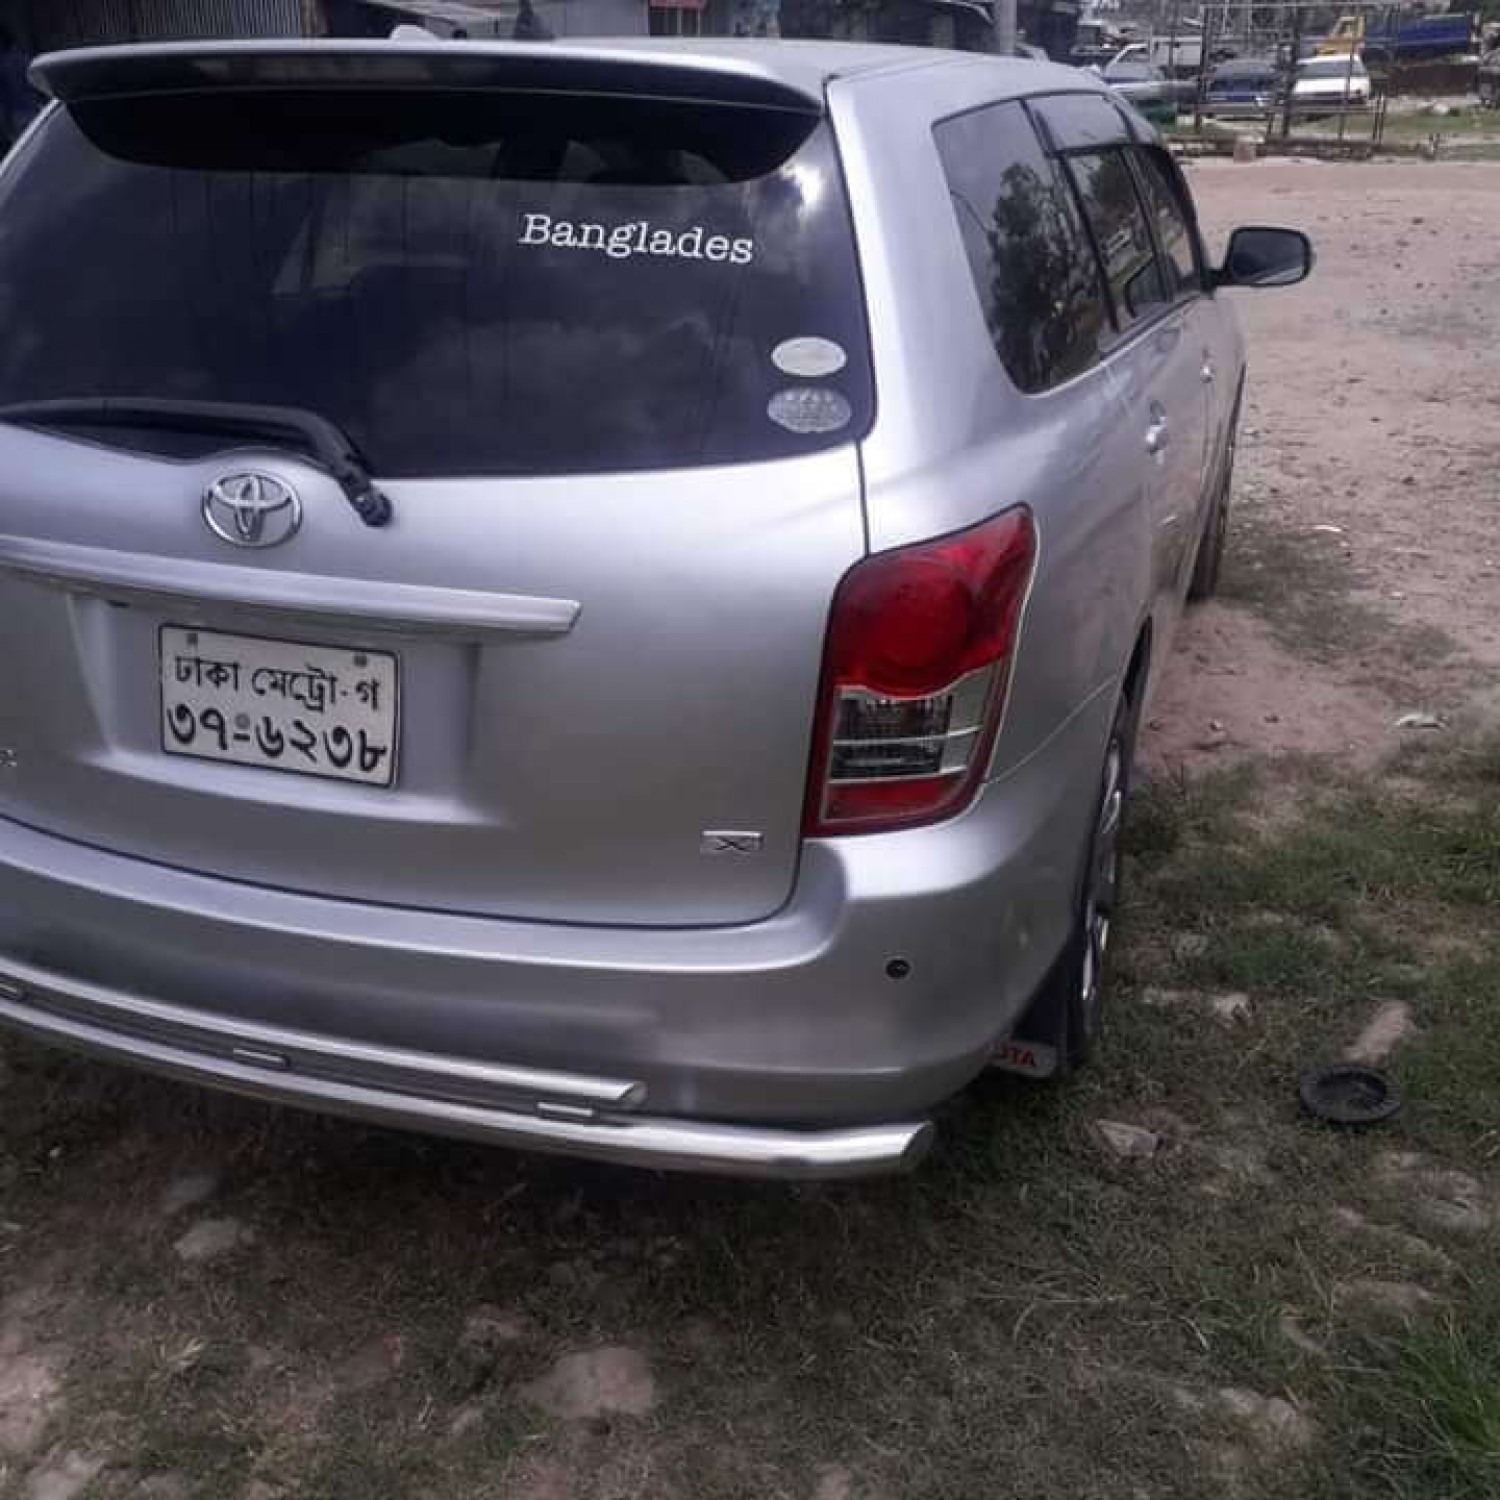

In [34]:
from IPython.display import Image, display

img_path = "image\\Vehicle0.jpg"
display(Image(filename=img_path))


In [35]:
sample_file = genai.upload_file(path=img_path)

In [36]:
model = genai.GenerativeModel(model_name="models/gemini-1.5-flash-002")
text = "Describe this Image"
response = model.generate_content([text, sample_file])

In [37]:
response.candidates[0].content.parts[0].text

'The image shows the rear of a silver Toyota Corolla Fielder station wagon. It has a Bangladeshi license plate. A "Bangladesh" sticker is visible on the rear window. The car is parked on a patch of dirt and grass.  A small black object, possibly a hubcap or piece of debris, is on the ground near the car\'s right rear tire. In the background, parts of other vehicles and a fence are visible.'